# Mrežni filtar

Ovo je primjer frekvencijske karakteristike filtra (K. K. Kostov et al. 2004).

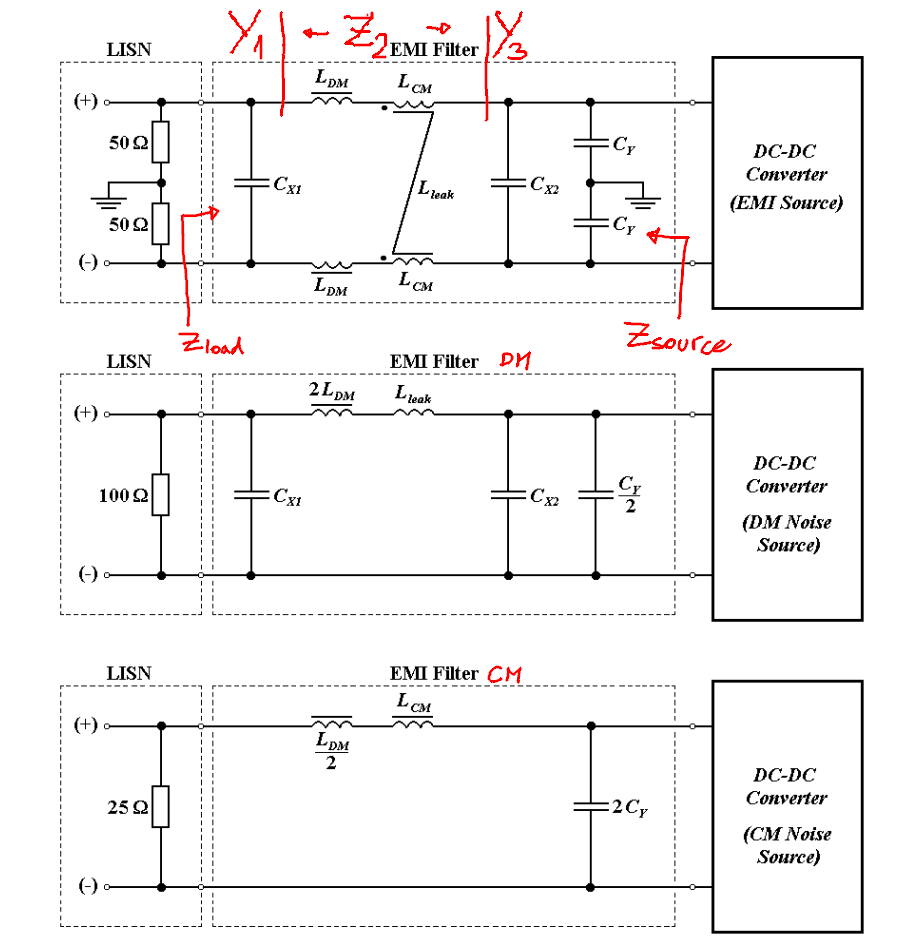

Uneseni gubitci za zajedničke (CM) smetnje:

$IL_{CM}=20\log\left ( \frac{\frac{c_{11}Z_{CM,load}+c_{12}}{Z_{CM,source}}+c_{21}Z_{CM,load}+c_{22}}{1+\frac{Z_{CM,load}}{Z_{CM,source}}}\right )$

gdje je ulančana matrica $\mathbf{C}$ jednaka,

$\mathbf{C}=\begin{bmatrix} c_{11} & c_{12}\\c_{21} & c_{22}
\end{bmatrix}=\mathbf{C_1}\mathbf{C_2}\mathbf{C_3}=\begin{bmatrix}
1 & 0\\ 
Y_1 & 1
\end{bmatrix}\begin{bmatrix}
1 & Z_2\\ 
0 & 1
\end{bmatrix}\begin{bmatrix}
1 & 0\\ 
Y_3 & 1
\end{bmatrix}$

Uneseni gubitci za zajedničke (DM) smetnje:

$IL_{DM}=20\log\left ( \frac{\frac{c_{11}Z_{DM,load}+c_{12}}{Z_{DM,source}}+c_{21}Z_{DM,load}+c_{22}}{1+\frac{Z_{DM,load}}{Z_{DM,source}}}\right )$

gdje je ulančana matrica $\mathbf{C}$ jednaka,

$\mathbf{C}=\begin{bmatrix} c_{11} & c_{12}\\c_{21} & c_{22}
\end{bmatrix}=\mathbf{C_1}\mathbf{C_2}=\begin{bmatrix}
1 & 0\\ 
Y_1 & 1
\end{bmatrix}\begin{bmatrix}
1 & Z_2\\ 
0 & 1
\end{bmatrix}$


Ulazna impedancija $Z_{XM,source}$ predstavlja impedanciju izvora smetnji (npr. prekidačkog napajanja), a izlazna impedancija $Z_{XM,load}$ predstavlja impedanciju tereta (npr. kabela ili LISN-a). Ti kombinacije impedancija su uzete u obzir prema CISPR 17 standardu: 50/50, 0,1/100 i 100/0,1.

U nižim ćelijama mogu se odabrati početne vrijednosti koje odgovaraju uobičajenim mrežnim filtrima.

In [ ]:
# fitler values from "Selection of Power Filters for SMPS", K. S. Kostov et. al.
RbD = 1000 # [MOhm] - does not exists
Cx1D = 0.1 # [uF]
Cx2D = 0.1 # [uF]
CyD = 4.7 # [nF]
LcmD = 4.2 # [mH]
LdmD = 0.0088 # 37 [uH]
LxCx1D = '20.7e-9'
RcCx1D = '80e-3'
RpCx1D = '15e9'
LxCx2D = '20.7e-9'
RcCx2D = '80e-3'
RpCx2D = '15e9'
LxCyD = '13.5e-9'
RcCyD = '300e-3'
RpCyD = '15e9'
CxLcmD = '6.03e-12'
RpLcmD = '0.102'

In [3]:
# fitler values of YUNPEN (small) and QLT (big) filter used for measurements
RbD = 1000 # [MOhm] - does not exists
Cx1D = 0.1 # [uF]
Cx2D = 0 # [uF]
CyD = 3.3 # [nF]
LcmD = 0.7 # [mH]
LdmD = 0.01 # 7 [uH]
LxCx1D = '20.7e-9'
RcCx1D = '80e-3'
RpCx1D = '15e9'
LxCx2D = '20.7e-9'
RcCx2D = '80e-3'
RpCx2D = '15e9'
LxCyD = '13.5e-9'
RcCyD = '300e-3'
RpCyD = '15e9'
CxLcmD = '6.03e-12'
RpLcmD = '0.102'

In [12]:
# fitler values of 30VBGS5 DELTA ELECTRONICS
RbD = 1 # [MOhm] - does not exists
Cx1D = 0.1 # [uF]
Cx2D = 0 # [uF]
CyD = 4.7 # [nF]
LcmD = 0.6 # [mH]
LdmD = 0.01 # 7 [uH]
LxCx1D = '20.7e-9'
RcCx1D = '80e-3'
RpCx1D = '15e9'
LxCx2D = '20.7e-9'
RcCx2D = '80e-3'
RpCx2D = '15e9'
LxCyD = '13.5e-9'
RcCyD = '300e-3'
RpCyD = '15e9'
CxLcmD = '6.03e-12'
RpLcmD = '0.102'

In [13]:
%matplotlib inline
from ipywidgets import widgets
from ipywidgets import Layout
import numpy as np
import matplotlib.pyplot as plt

style = {'description_width': '150px'}
fmin = widgets.FloatLogSlider(min=1, max=6, step=1, value=1e4,description='$f_{min}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
fmax = widgets.FloatLogSlider(min=7, max=10, step=1, value=3e7,description='$f_{max}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
ymin = widgets.IntSlider(min=-50,max=20, step=1, value=-20,description='plot $y_{min}$:',readout_format='.4f',style=style,layout=Layout(width='75%'), continuous_update=False)
ymax = widgets.IntSlider(min=20,max=200, step=1, value=140,description='plot $y_{max}$:',readout_format='.1f',style=style,layout=Layout(width='75%'), continuous_update=False)

sRb = widgets.FloatSlider(min=0.1, max=1000, step=0.01, value=RbD,description='Rb [MOhm]:',style=style,layout=Layout(width='75%'), continuous_update=False)
sCx1 = widgets.FloatSlider(min=0.01, max=10, step=0.01, value=Cx1D,description='Cx1 [uF]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tCx1Lx = widgets.Text(value=LxCx1D,placeholder='',description='Cx1:Lx [H]:',style=style,layout=Layout(width='25%'), continuous_update=False)
tCx1Rc = widgets.Text(value=RcCx1D,placeholder='',description='Cx1:Rc [Ohm]:',style=style,layout=Layout(width='25%'), continuous_update=False)
tCx1Rp = widgets.Text(value=RpCx1D,placeholder='',description='Cx1:Rp [Ohm]:',style=style,layout=Layout(width='25%'), continuous_update=False)

sCx2 = widgets.FloatSlider(min=0.0, max=10, step=0.01, value=Cx2D,description='Cx2 [uF]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tCx2Lx = widgets.Text(value=LxCx2D,placeholder='',description='Cx2:Lx [H]:',style=style,layout=Layout(width='25%'), continuous_update=False)
tCx2Rc = widgets.Text(value=RcCx2D,placeholder='',description='Cx2:Rc [Ohm]:',style=style,layout=Layout(width='25%'), continuous_update=False)
tCx2Rp = widgets.Text(value=RpCx2D,placeholder='',description='Cx2:Rp [Ohm]:',style=style,layout=Layout(width='25%'), continuous_update=False)

sCy = widgets.FloatSlider(min=1, max=10, step=0.01, value=CyD,description='Cy [nF]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tCyLx = widgets.Text(value=LxCyD,placeholder='',description='Cy:Lx [H]:',style=style,layout=Layout(width='25%'), continuous_update=False)
tCyRc = widgets.Text(value=RcCyD,placeholder='',description='Cy:Rc [Ohm]:',style=style,layout=Layout(width='25%'), continuous_update=False)
tCyRp = widgets.Text(value=RpCyD,placeholder='',description='Cy:Rp [Ohm]:',style=style,layout=Layout(width='25%'), continuous_update=False)

sLcm = widgets.FloatSlider(min=0.01, max=10, step=LdmD, value=LcmD,description='Lcm [mH]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tLcmCx = widgets.Text(value=CxLcmD,placeholder='',description='Lcm:Cx [F]:',style=style,layout=Layout(width='25%'), continuous_update=False)
tLcmRp = widgets.Text(value=RpLcmD,placeholder='',description='Lcm:Rp [Ohm]:',style=style,layout=Layout(width='25%'), continuous_update=False)

sLdm = widgets.FloatSlider(min=0.0, max=1, step=0.01, value=0.01,description='LDM=%LCM:',style=style,layout=Layout(width='75%'), continuous_update=False)
#sZS = widgets.FloatSlider(min=0.1, max=100, step=0.1, value=50,description='ZS [Ohm]:',style=style,layout=Layout(width='75%'), continuous_update=False)
#sZL = widgets.FloatSlider(min=0.1, max=100, step=0.1, value=50,description='ZL [Ohm]:',style=style,layout=Layout(width='75%'), continuous_update=False)

rc = widgets.RadioButtons(options=['real', 'ideal'], description='components',disabled=False)

def f(fmin, fmax, ymin, ymax, Rb, Cx1, Cx2, Cy, Lcm, Ldm, rc, LxCx1, RcCx1, RpCx1, LxCx2, RcCx2, RpCx2, LxCy, RcCy, RpCy, CxLcm, RpLcm):            
                           
    fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
    plt.rcParams.update({'font.size': 18})  
    axes = plt.gca()
    axes.set_xscale("log")
    axes.set_yscale("linear")   
    plt.sca(axes) 
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Attenuation [dB]')          
    plt.grid(axis='both')       
    plt.ylim(bottom = ymin, top = ymax)             
    plt.xlim(left = fmin, right = fmax)     
    
    
    Rb = Rb*1e6
    Cx1 = Cx1/1e6   
    Cx2 = Cx2/1e6 
    Cy = Cy/1e9
    Lcm = Lcm/1e3
    Ldm = Ldm*Lcm
    LxCx1 = float(LxCx1)
    RcCx1 = float(RcCx1)
    RpCx1 = float(RpCx1)
    LxCx2 = float(LxCx2)
    RcCx2 = float(RcCx2)
    RpCx2 = float(RpCx2)
    LxCy = float(LxCy)
    RcCy = float(RcCy)
    RpCy = float(RpCy)
    CxLcm = float(CxLcm)
    RpLcm = float(RpLcm)
    
    
    freq = np.logspace(np.log10(fmin), np.log10(fmax), num=500)
    if (rc == 'ideal'):
        ZCX1 = 1/(2j*np.pi*Cx1*freq) # simple
        if (Cx2==0):
            ZCX2 = 1e15
        else:
            ZCX2 = 1/(2j*np.pi*Cx2*freq) # simple
        ZCY = 1/(2j*np.pi*Cy*freq) # simple
        
        ZLCM = 2j*np.pi*freq*Lcm # simple
        ZLDM = 0
        ZLCMleak = 2j*np.pi*Ldm*freq
         
    else:
        ZCX1 = RcCx1 + 2j*np.pi*freq*LxCx1+RpCx1/(1+2j*np.pi*freq*RpCx1*Cx1) # complex
        ZCX2 = RcCx2 + 2j*np.pi*freq*LxCx2+RpCx2/(1+2j*np.pi*freq*RpCx2*Cx2) # complex
        ZCY = RcCy + 2j*np.pi*freq*LxCy+RpCy/(1+2j*np.pi*freq*RpCy*Cy) # complex
        
        ZLCM = (RpLcm+2j*np.pi*freq*Lcm)/(1-((2*np.pi*freq)**2)*Lcm*CxLcm+2j*np.pi*freq*RpLcm*CxLcm) # complex
        ZLDM = 0
        ZLCMleak = 2j*np.pi*Ldm*freq
        
    # DM INSERTION LOSS
    Y1 = 1/ZCX2 + 1/(2*ZCY)
    Z2 = 2*ZLDM + ZLCMleak
    Y3 = 1/ZCX1 

    c11 = 1+Z2*Y3
    c12 = Z2
    c21 = Y1+Y1*Z2*Y3+Y3
    c22 = 1+Y1*Z2

    ZDMload = 50
    ZDMsource = 50
    nom = (c11*ZDMload+c12)/ZDMsource + c21*ZDMload + c22
    den = 1 + ZDMload/ZDMsource
    ILDM1 = 20*np.log10(np.abs(nom/den))
    l1 = 'DM 50/50'

    ZDMsource = 100
    ZDMload = 0.1
    nom = (c11*ZDMload+c12)/ZDMsource + c21*ZDMload + c22
    den = 1 + ZDMload/ZDMsource
    ILDM2 = 20*np.log10(np.abs(nom/den))
    l2 = 'DM 100/0.1'

    ZDMsource = 0.1
    ZDMload = 100
    nom = (c11*ZDMload+c12)/ZDMsource + c21*ZDMload + c22
    den = 1 + ZDMload/ZDMsource
    ILDM3 = 20*np.log10(np.abs(nom/den))
    l3 = 'DM 0.1/100'        

    axes.plot(freq, ILDM1, linestyle=':',label=l1)
    axes.plot(freq, ILDM2, linestyle=':',label=l2)
    axes.plot(freq, ILDM3, linestyle=':',label=l3)
    
    plt.gca().set_prop_cycle(None)   
    # CM INSERTION LOSS
    Y1 = 2/(ZCY)
    Z2 = ZLCM+ZLDM/2

    c11 = 1
    c12 = Z2
    c21 = Y1
    c22 = 1+Y1*Z2

    ZCMsource = 50
    ZCMload = 50
    nom = (c11*ZCMload+c12)/ZCMsource + c21*ZCMload + c22
    den = 1 + ZCMload/ZCMsource
    ILCM1 = 20*np.log10(np.abs(nom/den))
    l1 = 'CM 50/50'

    ZCMsource = 100
    ZCMload = 0.1
    nom = (c11*ZCMload+c12)/ZCMsource + c21*ZCMload + c22
    den = 1 + ZCMload/ZCMsource
    ILCM2 = 20*np.log10(np.abs(nom/den))
    l2 = 'CM 100/0.1'

    ZCMsource = 0.1
    ZCMload = 100
    nom = (c11*ZCMload+c12)/ZCMsource + c21*ZCMload + c22
    den = 1 + ZCMload/ZCMsource
    ILCM3 = 20*np.log10(np.abs(nom/den))
    l3 = 'CM 0.1/100'

    axes.plot(freq, ILCM1, linestyle='-',label=l1)
    axes.plot(freq, ILCM2, linestyle='-',label=l2)
    axes.plot(freq, ILCM3, linestyle='-',label=l3)    
    
    leg = axes.legend();                                     
    
out = widgets.interactive_output(f, 
                                 {'fmin': fmin, 'fmax': fmax, 'ymin': ymin, 'ymax': ymax, 
                                  'Rb': sRb, 'Cx1': sCx1, 'Cx2': sCx2, 'Cy': sCy, 
                                  'Lcm': sLcm, 'Ldm': sLdm, 'rc': rc, 
                                  'LxCx1': tCx1Lx, 'RcCx1': tCx1Rc, 'RpCx1': tCx1Rp,
                                  'LxCx2': tCx2Lx, 'RcCx2': tCx2Rc, 'RpCx2': tCx2Rp,
                                  'LxCy': tCyLx, 'RcCy': tCyRc, 'RpCy': tCyRp,
                                  'CxLcm': tLcmCx, 'RpLcm': tLcmRp})

tab1 = widgets.VBox(children=[fmin,fmax, ymin, ymax])
tab2 = widgets.VBox(children=[widgets.HBox(children=[sRb]),
                              widgets.HBox(children=[sCx1]),
                              widgets.HBox(children=[tCx1Lx,tCx1Rc,tCx1Rp]),
                              widgets.HBox(children=[sCx2]),
                              widgets.HBox(children=[tCx2Lx,tCx2Rc,tCx2Rp]),                              
                              widgets.HBox(children=[sCy]),
                              widgets.HBox(children=[tCyLx,tCyRc,tCyRp]),                              
                              widgets.HBox(children=[sLcm]),
                              widgets.HBox(children=[tLcmCx,tLcmRp]),                              
                              widgets.HBox(children=[sLdm]),
                              rc])

                     
                     
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'filter parameters')



widgets.VBox([tab, out])